In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
from get_data import get_data
from train import train,score,normalize
import pandas as pd
import seaborn as sns
from tqdm.notebook import trange, tqdm
from model import LogisticRegression, OnehotTransformer,LogisticRegressionPytorch
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Device used = cuda


In [ ]:
X,Y = get_data(type=f"eda_augs_{4}_n_{100}")
X,Y = get_data()
transformer = OnehotTransformer(ngram_range=(1, 1), min_df=1, max_df=1.0, verbose_vocab=False)
transformer.fit(X,Y)
X = transformer.transform(X)

X = torch.tensor(X)
model = LogisticRegressionPytorch(len(X[0]),3000)

model.train(X,Y)

In [ ]:
Xt, Yt = get_data(type="dev")
model.score(transformer.transform(Xt),Yt)

In [2]:
temp = OnehotTransformer(ngram_range=(1, 1), min_df=1, max_df=1.0, verbose_vocab=False)

In [3]:
Xt, Yt = get_data(type="dev")
temp  = temp.fit(Xt)

In [6]:
Xt = temp.transform(Xt)

In [11]:
len(temp.vocab)

21766

In [7]:
len(Xt[0])

21766

In [3]:
ns = [10,50,100,500,2000]
augs = [4,8,16,32,64]


Xt, Yt = get_data(type="dev")

length = len(ns)*len(augs)
data = {"n":[0]*length,
       "augs":[0]*length,
       "score":[0.0]*length,
       "vocab":[0]*length,
       "runs":[0]*length}
df = pd.DataFrame(data)

i = 0
for n in tqdm(ns):
    for _ in range(5):
        X,Y = get_data(f"n_{n}",early_return=False)
        model, vocab = train( X, Y, epochs = 20, batch_size=64,embed_dim=100,lstm_dim=100,min_df=0,verbose=False,LSTM=False)
        acc = score(model,vocab,Xt,Yt,verbose=False)
        df.at[i,"n"] = n
        df.at[i,"score"] = (acc + df.at[i,"runs"]*df.at[i,"score"])/(df.at[i,"runs"]+1)
        df.at[i,"vocab"] = len(vocab)
        df.at[i,"runs"] +=1
    i+=1
    for aug in augs:
        for _ in range(5):
        #print(f"\neda_augs_{aug}_n_{n}")
            X,Y = get_data(type=f"eda_augs_{aug}_n_{n}")
            model, vocab = train( X, Y, epochs = 20, batch_size=64,embed_dim=100,lstm_dim=100,min_df=0,verbose=False)
            acc = score(model,vocab,Xt,Yt,verbose=False)
            df.at[i,"n"] = n
            df.at[i, "augs"] = aug
            df.at[i,"score"] = (acc + df.at[i,"runs"]*df.at[i,"score"])/(df.at[i,"runs"]+1)
            df.at[i,"vocab"] = len(vocab)
            df.at[i,"runs"] +=1
    i+=1

  0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: mat1 dim 1 must match mat2 dim 0

In [ ]:
df

In [ ]:
df.to_csv("EDA_results.csv")

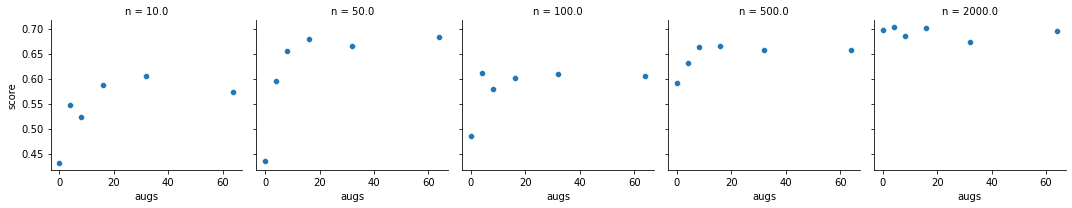

In [6]:
g = sns.FacetGrid(df,col="n")
g.map(sns.scatterplot,"augs","score")

In [69]:
X,Y = get_data(f"n_{500}",early_return=False)
model, vocab = train( X, Y, epochs = 10, batch_size=64,embed_dim=100,lstm_dim=100,min_df=0,verbose=False)
print(score(model,vocab,X,Y,verbose=False))
acc = score(model,vocab,Xt,Yt,verbose=False)
print(acc)

0.761
0.569
